## REST API

In [ ]:
!pip install pycoingecko

In [1]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

In [11]:
cg = CoinGeckoAPI()
bitcoindata = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30 )
bitcoindata

{'prices': [[1644030153620, 41454.153394543246],
  [1644033677354, 41492.851007424324],
  [1644037259789, 41500.88294308617],
  [1644040944681, 41617.270413147206],
  [1644044508823, 41589.306275435556],
  [1644048092045, 41450.765334100885],
  [1644051914244, 41517.29968755049],
  [1644055232450, 41554.04350221532],
  [1644058931156, 41620.98173361676],
  [1644062537684, 41507.6632760277],
  [1644066096887, 41477.99098334493],
  [1644069739927, 41587.18008789399],
  [1644073298224, 41632.34712267819],
  [1644076870578, 41837.961720181695],
  [1644080484986, 41432.84441326685],
  [1644084156824, 41687.76652862013],
  [1644087694028, 41713.41706711682],
  [1644091329056, 41647.17127112506],
  [1644094924238, 41708.31780498629],
  [1644098480726, 41745.27004179458],
  [1644102130994, 41663.43309484516],
  [1644105739163, 41493.690050910525],
  [1644109336146, 41599.71576444385],
  [1644112830570, 41683.43169303862],
  [1644116400686, 41571.63607969719],
  [1644120102071, 41544.9255658740

In [12]:
bitcoinpricedata = bitcoindata['prices'] # first value of nested list is timestamp and sencond is bitcoin pricing
data = pd.DataFrame(bitcoinpricedata, columns = ['TimeStamp','Price'])
# data
data['Date'] = pd.to_datetime(data['TimeStamp'],unit='ms')
data.iloc[:,1:3]
data

,TimeStamp,Price,Date
0,1644030153620,41454.153395,2022-02-05 03:02:33.620
1,1644033677354,41492.851007,2022-02-05 04:01:17.354
2,1644037259789,41500.882943,2022-02-05 05:00:59.789
3,1644040944681,41617.270413,2022-02-05 06:02:24.681
4,1644044508823,41589.306275,2022-02-05 07:01:48.823
...,...,...,...
715,1646607719226,39053.327616,2022-03-06 23:01:59.226
716,1646611212998,38442.991746,2022-03-07 00:00:12.998
717,1646614909472,38375.117222,2022-03-07 01:01:49.472
718,1646618435676,38417.637112,2022-03-07 02:00:35.676


In [28]:
candlestick_data = data.groupby(data.Date.dt.date).agg({'Price':['min','max','first','last']})
candlestick_data

Price                                          
                     min           max         first          last
Date                                                              
2022-02-05  41432.844413  41837.961720  41454.153395  41663.433095
2022-02-06  41388.237025  41769.576120  41493.690051  41708.010101
2022-02-07  41887.515947  44425.793222  42475.543221  44183.676337
2022-02-08  43027.310945  44938.360267  43910.929986  44156.931122
2022-02-09  43383.780066  44758.036782  44184.447512  44637.240496
2022-02-10  43832.229497  45481.588945  44383.888055  43914.600338
2022-02-11  42175.813082  43876.154545  43628.139532  42175.813082
2022-02-12  41985.314998  42917.689518  42445.388768  42230.980160
2022-02-13  42011.860490  42672.324428  42254.738123  42425.875633
2022-02-14  41793.983580  42741.510518  42247.835953  42695.132210
2022-02-15  42601.826085  44358.951627  42634.573784  44259.938508
2022-02-16  43526.665148  44574.320571  44574.320571  44102.769208
2022-02-17  40772.061390  44113.431871  43953.748004  40772.061390
2022-02-18  39868.328563  40948.407517  40562.986950  40039.001239
2022-02-19  39822.318524  40442.261366  40073.495362  40102.312136
2022-02-20  38263.046610  40192.759121  40192.759121  38779.673227
2022-02-21  37557.600159  39424.088165  38514.008536  37682.442088
2022-02-22  36629.471043  38151.682093  37059.979402  37939.206366
2022-02-23  37583.890059  39069.828402  38337.203855  37710.854202
2022-02-24  34740.011875  38468.399036  37372.292680  37893.439659
2022-02-25  38363.345489  39439.377050  38363.345489  39358.549023
2022-02-26  38886.634632  39804.535199  39316.162076  39233.373806
2022-02-27  37647.496497  39851.018387  39178.514604  37839.881186
2022-02-28  37587.930466  43546.662123  37788.416953  43546.662123
2022-03-01  43142.690943  44694.170377  43225.404677  44215.928768
2022-03-02  43515.996051  44790.135110  44459.591628  44151.615433
2022-03-03  42040.718867  44023.893997  43980.707382  42568.913728
2022-03-04  38971.954968  42491.978393  42491.978393  38971.954968
2022-03-05  38907.833258  39556.923820  39200.299736  39515.000494
2022-03-06  38354.338448  39608.446703  39465.923509  39053.327616
2022-03-07  38124.295366  38442.991746  38442.991746  38124.295366

In [29]:
import plotly.graph_objects as go
from matplotlib.pyplot import *

In [26]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

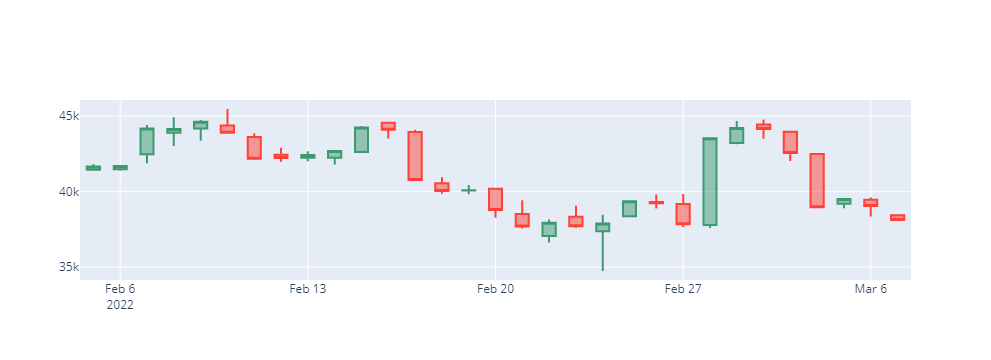

In [30]:
fig = go.Figure(data=[go.Candlestick(x= candlestick_data.index,
                                    open= candlestick_data['Price']['first'],
                                    high= candlestick_data['Price']['max'],
                                     low= candlestick_data['Price']['min'],
                                     close= candlestick_data['Price']['last'])
                                   ])
fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [15]:
# pip install plotly
# pip install cufflinks

SyntaxError: invalid syntax (Temp/ipykernel_5096/167200752.py, line 1)

In [31]:
#you will need the following library 
!pip install ibm_watson wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=287b26fc8b8bb1a83d41350337346043c380890ed9b263a9ffe8392c0f9a1b56
  Stored in directory: c:\users\piyus\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
